Latent Semantic Analysis _ 2.0

Import statements

In [1]:
from xml.etree import ElementTree
import re
from io import StringIO
import csv
import bs4
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import sklearn
import sklearn.feature_extraction
import numpy as np
from math import log
from numpy import asarray, sum

Importing Reuters Data Set and parsing using Beautiful Soup

In [2]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
numberOfFiles = 1
def makeString(counter):
    returnString = ""
    if counter < 10:
        returnString = str(0) + str(counter)
    else:
        returnString = '' + str(counter)
    return returnString

def strin(a):
    returnstring= str(a)
    return returnstring

# Actually parses the file given a filename, commented out lots of lines of code that can be used for other tags
def parseFile(filename,word1):
    f=open(filename,'r')
    filetext=f.read()
    totstring=""
    for x in filetext:
        string=re.sub("[^0-9a-zA-Z<>/\s=!-\"\"]+","", x)
        totstring+=string
    soup=BeautifulSoup(totstring,"html.parser")
    #print(soup)
    bodies=list()
    topics=list()
    titles=soup.findAll("titles")
    bodies=soup.findAll("body")
    topics=soup.findAll("topics")
  
    paragraphs = []

    for x in bodies:
        paragraphs.append(str(x))
    #print(type(bodies))
    #print(paragraphs)
    body = paragraphs[0]
    #print(body)
    word=list()
    word1=[]
    word2=list()
    #print(topics)
    return paragraphs

for counter in range(0,numberOfFiles):
    dataNameString = makeString(counter)
    dataname='C:\\Users\\saraf\\Downloads\\Data\\reut2-0'+dataNameString+ '.sgm'
    filename=os.path.join(fileDir,dataname)
    print("Reading ",dataname,"....")
    word1=list()
    paragraphs = parseFile(filename,word1)


Reading  C:\Users\saraf\Downloads\Data\reut2-000.sgm ....


Extracting Body of each Document

In [3]:
bod = []
for para in paragraphs:
    para = para[6:-16].replace("\n"," ").replace("/"," / ")
    bod.append(para)

Using vectorizer to create a dictionary of words

In [4]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=2)
titles = bod
stopwords = ['and','for','in','of','the','to'] 
titles=[title.lower() for title in titles]
newtitle=[]
for title in titles:
    stri=""
    for word in title.split():
        if word in stopwords or word.isdigit():
            continue
        
        else:
            stri=stri+word+" "
       # print('str',word)
    newtitle.append(stri)
    
#print(newtitle)
X = vectorizer.fit_transform(newtitle).toarray()
print('Subset of the Dictionary (Vocabulary)')
item = []
for items in vectorizer.vocabulary_.items():
    if(items[1]%150==0):
        item.append(items)
item

Subset of the Dictionary (Vocabulary)


[('sales', 3900),
 ('under', 4650),
 ('those', 4500),
 ('enhancement', 1500),
 ('intended', 2250),
 ('arm', 300),
 ('denied', 1200),
 ('huge', 2100),
 ('agreement', 150),
 ('barrel', 450),
 ('morton', 2850),
 ('yrago', 4950),
 ('external', 1650),
 ('10year', 0),
 ('lot', 2550),
 ('forecasts', 1800),
 ('doubled', 1350),
 ('course', 1050),
 ('resignation', 3750),
 ('sunday', 4350),
 ('pakistan', 3150),
 ('cheung', 750),
 ('kremlin', 2400),
 ('brussels', 600),
 ('component', 900),
 ('objecting', 3000),
 ('pool', 3300),
 ('grants', 1950),
 ('matsushita', 2700),
 ('prospectus', 3450),
 ('recording', 3600),
 ('shopping', 4050),
 ('sprinkels', 4200),
 ('wallis', 4800)]

TF-IDF

In [5]:
tot = np.zeros(X.shape[0])
totwords=np.zeros(X.shape[1])
tf=np.zeros(X.shape)

def TFIDF1(A):
   
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            tot[i]=tot[i]+A[i,j]
            
    for i in range(A.shape[1]):
        for j in range(A.shape[0]):
            if A[j,i]>0:
                totwords[i]+=1
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            tf[i,j]=A[i,j]/tot[i]*log(A.shape[0]/totwords[j])
TFIDF1(X)

Performing PCA and clustering documents

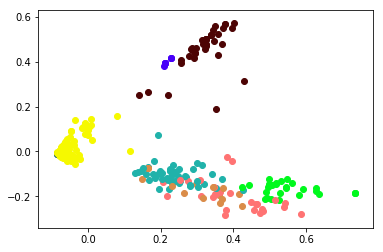

In [6]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts


# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf)
# print labels

X = (csr_matrix(tf)).todense()
# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

Displaying 10 topics for first 20 documents

In [7]:
d ={}

#sorted(mydict.iteritems(), key=lambda (k,v): (v,k))


for j in range (0,20):
    d ={}
    for i in range (0,tf[j].shape[0]):
            d[i]=tf[j][i]
    d = sorted(d.items(), key=lambda x: x[1], reverse = True)  
    d = d[:10]
    print("Topics for Doc {}".format(j))
    for x in range(0,10):
        print((list(vectorizer.vocabulary_.keys())[list(vectorizer.vocabulary_.values()).index(d[x][0])]))
    print("-----------------")
    print()


Topics for Doc 0
cocoa
dec
sept
smith
bags
times
york
crop
at
oct
-----------------

Topics for Doc 1
bp
standard
venture
america
oil
north
ltbp
operated
oversight
manage
-----------------

Topics for Doc 2
commerce
texas
network
create
comptroller
harris
bancshares
link
application
county
-----------------

Topics for Doc 3
bankamerica
analysts
debt
longer
banking
analyst
cohn
brazil
interstate
delay
-----------------

Topics for Doc 4
level
wheat
cwt
price
barley
sorghum
after
release
corn
entered
-----------------

Topics for Doc 5
mar
nil
feb
total
soybean
sunflowerseed
may
wheat
brackets
oilseed
-----------------

Topics for Doc 6
red
partnership
offering
limited
inns
hotels
registration
interests
mortgage
covering
-----------------

Topics for Doc 7
moodys
ratings
lowered
baa3
establishment
marathon
positioned
unsecured
usx
implications
-----------------

Topics for Doc 8
shareholders
recommend
board
voted
authorized
twoforone
shares
april
stock
directors
-----------------

Topic